### Libraries and packages

In [ ]:
from sklearn.cluster import DBSCAN,KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import collections
import seaborn as sn
import pandas as pd
import numpy as np
import scipy.io
sn.set()

In [ ]:
!gdown --id 1vIY8X7H9T3dvRMw6rQm7qBkYHKJtT_7X

Downloading...
From: https://drive.google.com/uc?id=1vIY8X7H9T3dvRMw6rQm7qBkYHKJtT_7X
To: /content/annthyroid.mat
100% 87.7k/87.7k [00:00<00:00, 5.91MB/s]


Dataset

In [ ]:
mat = scipy.io.loadmat('annthyroid.mat')
dataset = pd.DataFrame(np.hstack((mat['X'], mat['y'])),
                                 columns = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5', 'attribute_6', 'Is_outlier'])
print('Shape of Dataset:',dataset.shape)
dataset.head()

Shape of Dataset: (7200, 7)


,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,Is_outlier
0,0.73,0.00060,0.015,0.120,0.082,0.146,0.0
1,0.24,0.00025,0.030,0.143,0.133,0.108,0.0
2,0.47,0.00190,0.024,0.102,0.131,0.078,0.0
3,0.64,0.00090,0.017,0.077,0.090,0.085,0.0
4,0.23,0.00025,0.026,0.139,0.090,0.153,0.0


In [ ]:
dataset.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,Is_outlier
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.520518,0.004861,0.019977,0.109430,0.097838,0.113215,0.074167
std,0.189269,0.022979,0.007539,0.035969,0.019085,0.036098,0.262060
min,0.010000,0.000000,0.000500,0.002000,0.017000,0.002000,0.000000
25%,0.370000,0.000710,0.017000,0.089000,0.087000,0.095000,0.000000
50%,0.550000,0.001700,0.020100,0.107000,0.097000,0.111000,0.000000
75%,0.670000,0.002700,0.022000,0.125000,0.104000,0.127000,0.000000
max,0.970000,0.530000,0.180000,0.600000,0.233000,0.642000,1.000000


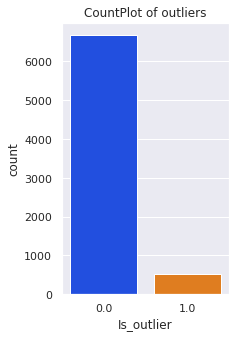

In [ ]:
plt.figure(figsize=(3,5))
plt.title('CountPlot of outliers')
sn.countplot(x="Is_outlier", data=dataset,palette='bright')

In [ ]:
dataset.apply(lambda column: f'{((column.isnull().sum()/dataset.shape[0])*100).round(2)} %')

attribute_1    0.0 %
attribute_2    0.0 %
attribute_3    0.0 %
attribute_4    0.0 %
attribute_5    0.0 %
attribute_6    0.0 %
Is_outlier     0.0 %
dtype: object

### Features and Targets

In [ ]:
features = dataset.iloc[:,:-1]
target = dataset[['Is_outlier']]
Predictions = pd.DataFrame()

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features),
                        columns = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5', 'attribute_6'])

### LOF

In [ ]:
LOF = LocalOutlierFactor(n_neighbors=200)
prediction = LOF.fit_predict(features)
Predictions['LOF'] = prediction
Predictions['LOF'] = Predictions['LOF'].map({1:0,-1:1})
collections.Counter(prediction)

Counter({-1: 572, 1: 6628})

In [ ]:
print(classification_report(target, Predictions['LOF']))
print(confusion_matrix(target, Predictions['LOF']))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      6666
         1.0       0.33      0.35      0.34       534

    accuracy                           0.90      7200
   macro avg       0.64      0.65      0.64      7200
weighted avg       0.90      0.90      0.90      7200

[[6283  383]
 [ 345  189]]


### Isolation Forset

In [ ]:
isolation_forest = IsolationForest(n_estimators=250)
prediction = isolation_forest.fit_predict(features)
Predictions['Isolation_Forest'] = prediction
Predictions['Isolation_Forest'] = Predictions['Isolation_Forest'].map({1:0,-1:1})
collections.Counter(prediction)

Counter({-1: 656, 1: 6544})

In [ ]:
print(classification_report(target, Predictions['Isolation_Forest']))
print(confusion_matrix(target, Predictions['Isolation_Forest']))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      6666
         1.0       0.30      0.37      0.33       534

    accuracy                           0.89      7200
   macro avg       0.62      0.65      0.63      7200
weighted avg       0.90      0.89      0.89      7200

[[6206  460]
 [ 338  196]]


### One class svm

In [ ]:
one_class_svm = OneClassSVM(gamma='auto')
prediction = one_class_svm.fit_predict(features)
Predictions['one_class_svm'] = prediction
Predictions['one_class_svm'] = Predictions['one_class_svm'].map({1:0,-1:1})
collections.Counter(prediction)

Counter({-1: 3601, 1: 3599})

In [ ]:
print(classification_report(target, Predictions['one_class_svm']))
print(confusion_matrix(target, Predictions['one_class_svm']))

              precision    recall  f1-score   support

         0.0       0.96      0.52      0.67      6666
         1.0       0.11      0.72      0.19       534

    accuracy                           0.53      7200
   macro avg       0.53      0.62      0.43      7200
weighted avg       0.90      0.53      0.64      7200

[[3450 3216]
 [ 149  385]]


### Elliptic Envelope

In [ ]:
COV = EllipticEnvelope()
prediction = COV.fit_predict(features)
Predictions['Elliptic_Envelope'] = prediction
Predictions['Elliptic_Envelope'] = Predictions['Elliptic_Envelope'].map({1:0,-1:1})
collections.Counter(prediction)

Counter({-1: 720, 1: 6480})

In [ ]:
print(classification_report(target, Predictions['Elliptic_Envelope']))
print(confusion_matrix(target, Predictions['Elliptic_Envelope']))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      6666
         1.0       0.39      0.53      0.45       534

    accuracy                           0.90      7200
   macro avg       0.68      0.73      0.70      7200
weighted avg       0.92      0.90      0.91      7200

[[6228  438]
 [ 252  282]]


### KMeans

In [ ]:
Kmeans_model = KMeans(2)
prediction = Kmeans_model.fit_predict(features)
Predictions["Kmeans"] = prediction
collections.Counter(prediction)

Counter({0: 5352, 1: 1848})

In [ ]:
print(classification_report(target, Predictions["Kmeans"]))
print(confusion_matrix(target, Predictions["Kmeans"]))

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      6666
         1.0       0.02      0.06      0.03       534

    accuracy                           0.68      7200
   macro avg       0.46      0.40      0.42      7200
weighted avg       0.84      0.68      0.75      7200

[[4852 1814]
 [ 500   34]]


### Gaussian Mixture Model

In [ ]:
GM_model = GaussianMixture(n_components=2)
prediction = GM_model.fit_predict(features)
Predictions["GMM"] = prediction
collections.Counter(prediction)

Counter({0: 6046, 1: 1154})

In [ ]:
print(classification_report(target, Predictions["GMM"]))
print(confusion_matrix(target, Predictions["GMM"]))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      6666
         1.0       0.35      0.76      0.48       534

    accuracy                           0.88      7200
   macro avg       0.66      0.82      0.71      7200
weighted avg       0.93      0.88      0.90      7200

[[5917  749]
 [ 129  405]]


### DBSCAN

In [ ]:
Dbscan = DBSCAN(eps=0.75, min_samples=5)
prediction = Dbscan.fit_predict(features)
Predictions["DBscan"] = prediction
Predictions['DBscan'] = Predictions['DBscan'].map({1:0,-1:1,0:0,2:0,3:0})
collections.Counter(Predictions['DBscan'])


Counter({0: 6615, 1: 585})

In [ ]:
print(classification_report(target, Predictions["DBscan"]))
print(confusion_matrix(target, Predictions["DBscan"]))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      6666
         1.0       0.31      0.34      0.33       534

    accuracy                           0.90      7200
   macro avg       0.63      0.64      0.63      7200
weighted avg       0.90      0.90      0.90      7200

[[6263  403]
 [ 352  182]]


### Experiments

In [ ]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(features)

Text(0.5, 1.0, '2-component Tsne')

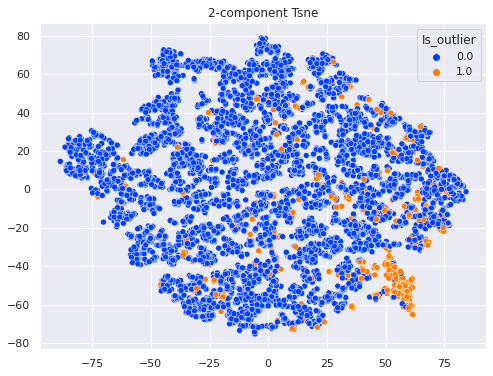

In [ ]:
plt.figure(figsize=(8,6))
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=dataset['Is_outlier'],palette='bright')
plt.title('2-component Tsne')


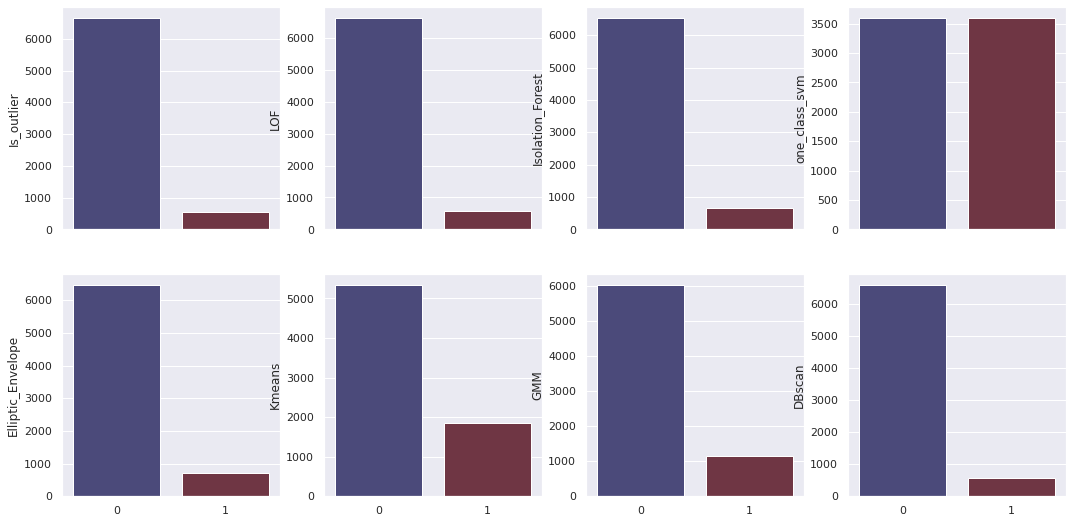

In [ ]:
range2 = list(range(0,2))
f, axes = plt.subplots(2, 4, figsize=(18, 9), sharex=True)
sn.barplot(x = range2, y = dataset['Is_outlier'].value_counts(),palette='icefire',ax=axes[0,0])
sn.barplot(x = range2, y = Predictions['LOF'].value_counts(),palette='icefire',ax=axes[0,1])
sn.barplot(x = range2, y = Predictions['Isolation_Forest'].value_counts(),palette='icefire',ax=axes[0,2])
sn.barplot(x = range2, y = Predictions['one_class_svm'].value_counts(),palette='icefire',ax=axes[0,3])
sn.barplot(x = range2, y = Predictions['Elliptic_Envelope'].value_counts(),palette='icefire',ax=axes[1,0])
sn.barplot(x = range2, y = Predictions['Kmeans'].value_counts(),palette='icefire',ax=axes[1,1])
sn.barplot(x = range2, y = Predictions['GMM'].value_counts(),palette='icefire',ax=axes[1,2])
sn.barplot(x = range2, y = Predictions['DBscan'].value_counts(),palette='icefire',ax=axes[1,3])

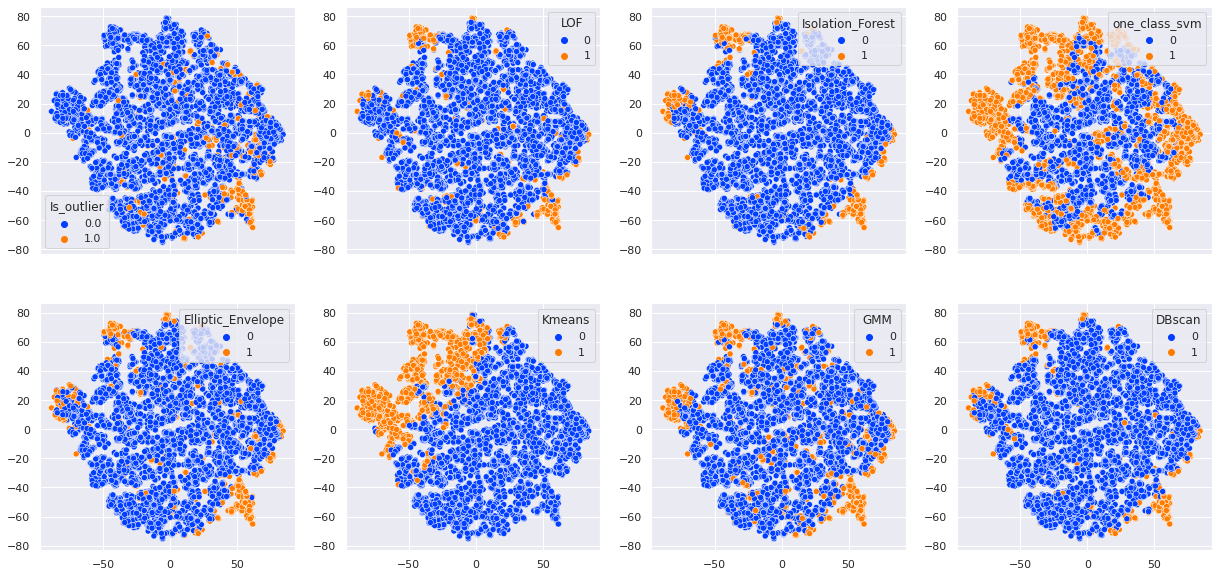

In [ ]:
f, axes = plt.subplots(2, 4, figsize=(21, 10), sharex=True)
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=dataset['Is_outlier'],palette='bright',ax=axes[0,0])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['LOF'],palette='bright',ax=axes[0,1])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['Isolation_Forest'],palette='bright',ax=axes[0,2])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['one_class_svm'],palette='bright',ax=axes[0,3])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['Elliptic_Envelope'],palette='bright',ax=axes[1,0])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['Kmeans'],palette='bright',ax=axes[1,1])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['GMM'],palette='bright',ax=axes[1,2])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['DBscan'],palette='bright',ax=axes[1,3])



### Statistical Approach

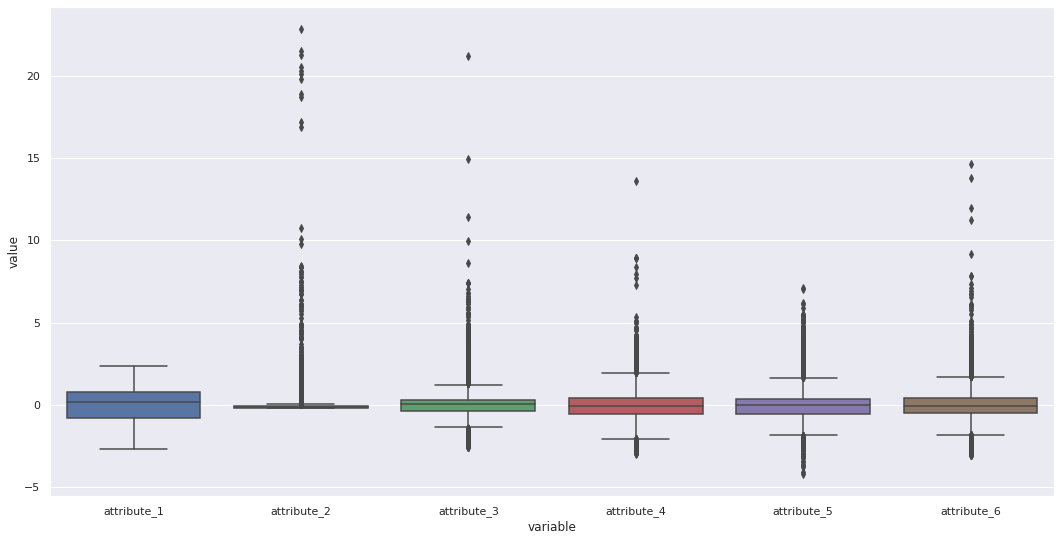

In [ ]:
plt.figure(figsize=(18,9))
sn.boxplot(x="variable", y="value", data=pd.melt(features))


In [ ]:
q = features.quantile(0.95)
features2 = features[features<q]
w = features2.quantile(0.01)
features2 = features2[features2>w]

prediction = features2.isnull().any(axis=1).map({False:0,True:1})
Predictions['statistical_approach'] = prediction
collections.Counter(Predictions['statistical_approach'])

Counter({0: 5397, 1: 1803})

In [ ]:
print(classification_report(target, Predictions['statistical_approach']))
print(confusion_matrix(target, Predictions['statistical_approach']))

              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86      6666
         1.0       0.18      0.61      0.28       534

    accuracy                           0.77      7200
   macro avg       0.57      0.70      0.57      7200
weighted avg       0.90      0.77      0.82      7200

[[5191 1475]
 [ 206  328]]


In [ ]:
pca = PCA(1)
pca_result = pd.DataFrame(pca.fit_transform(features), index=features.index).to_numpy().ravel()

### Test Grubbs

In [ ]:
!pip install outlier_utils
from outliers import smirnov_grubbs as grubbs

In [ ]:
grubbs_prediction = np.zeros((7200,), dtype=int)
index = grubbs.min_test_indices(pca_result, alpha=750)
for e in index:
  grubbs_prediction[e] = 1
Predictions['grubbs_prediction'] = grubbs_prediction
collections.Counter(grubbs_prediction)

Counter({0: 6193, 1: 1007})

In [ ]:
print(classification_report(target, grubbs_prediction))
print(confusion_matrix(target, grubbs_prediction))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      6666
         1.0       0.31      0.58      0.40       534

    accuracy                           0.87      7200
   macro avg       0.63      0.74      0.66      7200
weighted avg       0.91      0.87      0.89      7200

[[5967  699]
 [ 226  308]]


### Analysis of Statistical Approach

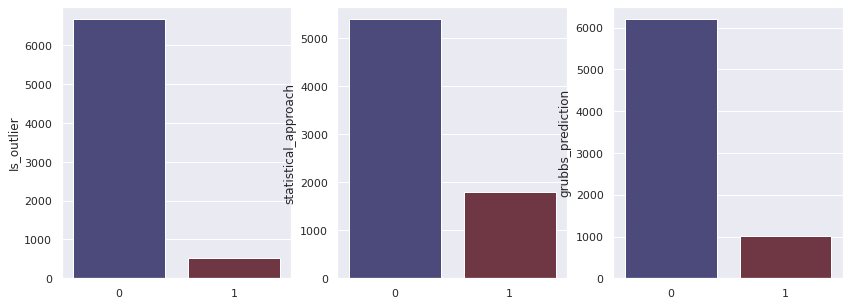

In [ ]:
range2 = list(range(0,2))
f, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=True)
sn.barplot(x = range2, y = dataset['Is_outlier'].value_counts(),palette='icefire',ax=axes[0])
sn.barplot(x = range2, y = Predictions['statistical_approach'].value_counts(),palette='icefire',ax=axes[1])
sn.barplot(x = range2, y = Predictions['grubbs_prediction'].value_counts(),palette='icefire',ax=axes[2])


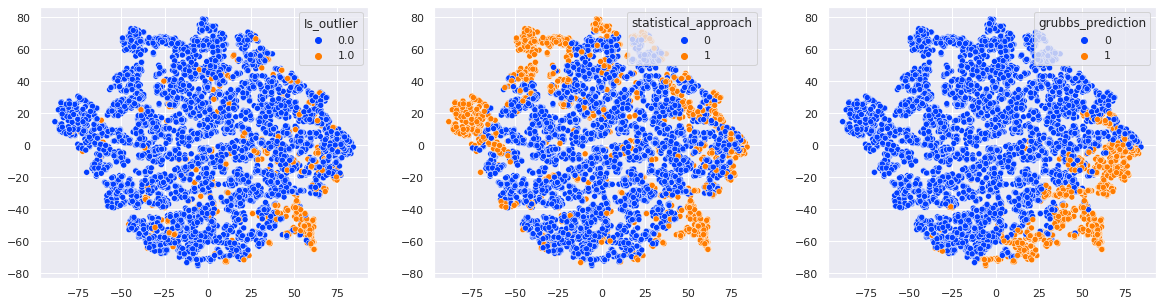

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=dataset['Is_outlier'],palette='bright',ax=axes[0])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['statistical_approach'],palette='bright',ax=axes[1])
sn.scatterplot(x = tsne_result[:,0], y = tsne_result[:,-1], hue=Predictions['grubbs_prediction'],palette='bright',ax=axes[2])




### Conclusion

In [5]:
conclusion = pd.DataFrame([['Local Outlier Factor',0.64,0.65,0.64],
              ['Isolation Forest',0.62,0.64,0.63],
              ['One Class SVM',0.53,0.62,0.43],
              ['Elliptic Envelope',0.68,0.73,0.70],
              ['Kmeans Clustering',0.46,0.40,0.42],
              ['Gaussian Mixture Model',0.66,0.82,0.71],
              ['DBScan',0.61,0.65,0.62],
              ['Statistical Approach',0.57,0.57,0.57],
              ['Grubbs Test',0.63,0.74,0.66]],
              columns=["Algorithm","Precision","Recall","F1-Score"])
conclusion = conclusion.set_index('Algorithm')
conclusion.style.background_gradient(cmap="YlGn")


,Precision,Recall,F1-Score
Algorithm,,,
Local Outlier Factor,0.640000,0.650000,0.640000
Isolation Forest,0.620000,0.640000,0.630000
One Class SVM,0.530000,0.620000,0.430000
Elliptic Envelope,0.680000,0.730000,0.700000
Kmeans Clustering,0.460000,0.400000,0.420000
Gaussian Mixture Model,0.660000,0.820000,0.710000
DBScan,0.610000,0.650000,0.620000
Statistical Approach,0.570000,0.570000,0.570000
Grubbs Test,0.630000,0.740000,0.660000
